In [1]:
%load_ext autoreload
%autoreload 2

# Prepearing the data

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px




In [3]:
from scripts.data import Olist_Data
from scripts.utils import haversine_distance

In [4]:
orders = Olist_Data().get_data_from_csv()['orders'].copy()
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Some info is lacking for :
* order_approved_at
* order_delivered_carrier_date
* order_delivered_customer_date

160 orders have no approval datastamp

In [6]:
orders[orders['order_approved_at'].isna()].shape

(160, 8)

141 of them were canceled and just 14 delivered (maybe some bug during data collection)

In [7]:
# taking a closer look on rows with missing order approved datetime
orders[orders['order_approved_at'].isna()].groupby('order_status').count()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_status,,,,,,,
canceled,141,141,141,0,0,0,141
created,5,5,5,0,0,0,5
delivered,14,14,14,0,14,14,14


1783 orders seem to not have any delivery to carrier

In [8]:
orders[orders['order_delivered_carrier_date'].isna()].shape

(1783, 8)

In [9]:
# taking a closer look on rows with missing order delivered to carrier datetime
orders[orders['order_delivered_carrier_date'].isna()].groupby('order_status').count()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_status,,,,,,,
approved,2,2,2,2,0,0,2
canceled,550,550,550,409,0,0,550
created,5,5,5,0,0,0,5
delivered,2,2,2,2,0,1,2
invoiced,314,314,314,314,0,0,314
processing,301,301,301,301,0,0,301
unavailable,609,609,609,609,0,0,609


Almost 3000 orders were not delivered

In [10]:
orders[orders['order_delivered_customer_date'].isna()].shape

(2965, 8)

In [11]:
# taking a closer look on rows with missing  datetime of delivery to customer
orders[orders['order_delivered_customer_date'].isna()].groupby('order_status').count()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_status,,,,,,,
approved,2,2,2,2,0,0,2
canceled,619,619,619,478,69,0,619
created,5,5,5,0,0,0,5
delivered,8,8,8,8,7,0,8
invoiced,314,314,314,314,0,0,314
processing,301,301,301,301,0,0,301
shipped,1107,1107,1107,1107,1107,0,1107
unavailable,609,609,609,609,0,0,609


There are definetely problems with data records cause some `order_status` indicates `delivered` while `order_delivered_customer_date` has NaN value

In [12]:
orders[(orders['order_delivered_customer_date'].isna()) & (orders['order_status'] == 'delivered') ]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaN,2018-07-24 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaN,2018-06-26 00:00:00
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaN,2018-07-19 00:00:00


Let's check the number of orders per `order_status`

In [13]:
orders.groupby('order_status').count().sort_values(by='order_id', ascending=False)

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_status,,,,,,,
delivered,96478,96478,96478,96464,96476,96470,96478
shipped,1107,1107,1107,1107,1107,0,1107
canceled,625,625,625,484,75,6,625
unavailable,609,609,609,609,0,0,609
invoiced,314,314,314,314,0,0,314
processing,301,301,301,301,0,0,301
created,5,5,5,0,0,0,5
approved,2,2,2,2,0,0,2


In [14]:
# for now we will just simplify our geolocation record by deleting rows that have
# identical zip codes but different locations

geo = Olist_Data().get_data_from_csv()['geolocation']
geo = geo.drop_duplicates(subset='geolocation_zip_code_prefix', keep='first')
geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
...,...,...,...,...,...
999774,99955,-28.107588,-52.144019,vila langaro,RS
999780,99970,-28.345143,-51.876926,ciriaco,RS
999786,99910,-27.863500,-52.084760,floriano peixoto,RS
999803,99920,-27.858716,-52.300403,erebango,RS


In [15]:
sellers = Olist_Data().get_data_from_csv()['sellers'].copy()
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [16]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [17]:
customers = Olist_Data().get_data_from_csv()['customers'].copy()
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [18]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [19]:
order_items = Olist_Data().get_data_from_csv()['order_items'].copy()
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [20]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
products = Olist_Data().get_data_from_csv()['products'].copy()
products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


For now let's try to merge it into one df.

In [24]:
df_order_customer = orders.merge(customers[['customer_id', 'customer_zip_code_prefix']], on='customer_id')
df_order_customer.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3149
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,47813
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,75265
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,59296
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,9195


In [26]:
df_seller_ord_item = order_items.merge(sellers[['seller_id', 'seller_zip_code_prefix']], on='seller_id')
df_seller_ord_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,27277
1,0188777fe321843a18be24a6e9aa1e53,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.9,9.94,27277
2,0191bbb5166d4b9a68df11797d5acfa9,1,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.9,20.17,27277
3,03054d8a8eefc2981cfad06f58e27979,1,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.9,15.16,27277
4,0c325ea6925de749e1420be0cf43587c,1,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.9,16.74,27277


In [27]:
df = df_seller_ord_item.merge(df_order_customer, on='order_id', how='left')
df.drop(['order_item_id'], axis=1, inplace=True)


In [28]:
df

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,28013
1,0188777fe321843a18be24a6e9aa1e53,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.90,9.94,27277,dc573d2a61a467e5e2826c1729691859,delivered,2017-07-23 16:13:37,2017-07-25 14:35:11,2017-07-27 18:45:50,2017-07-28 16:18:00,2017-08-08 00:00:00,25240
2,0191bbb5166d4b9a68df11797d5acfa9,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.90,20.17,27277,62b59a64eb786a96516229b7f3612c72,delivered,2017-08-10 12:17:35,2017-08-10 12:30:15,2017-08-15 19:26:45,2017-08-24 18:15:16,2017-09-08 00:00:00,93010
3,03054d8a8eefc2981cfad06f58e27979,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.90,15.16,27277,9bd2f246e81c19f65c539ce426288ef5,delivered,2017-10-02 10:25:22,2017-10-03 10:35:11,2017-10-09 17:57:50,2017-10-19 21:03:49,2017-10-25 00:00:00,3560
4,0c325ea6925de749e1420be0cf43587c,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.90,16.74,27277,e03505278b34146e87c0b4eb41e4f082,delivered,2017-07-01 15:27:23,2017-07-01 15:43:50,2017-07-05 12:00:33,2017-07-10 17:17:21,2017-07-25 00:00:00,18540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fdfeec75aa07c1d2a88b17b8fbfc7b8f,11059273f4bc1a293777e98c89807c62,dbc51f5e45d654ecc16cb68e6817ecea,2017-03-01 22:42:22,199.99,18.14,14402,8fbd29638b8ddd97d012473abf1f7752,delivered,2017-02-24 22:28:55,2017-02-24 22:42:22,2017-03-04 11:58:57,2017-03-14 16:17:59,2017-03-21 00:00:00,23812
112646,fe68b52db13993f58175fa589125d345,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.00,16.21,82620,94203a446c1b46b5ac95b0aaf7221804,delivered,2017-08-11 10:15:22,2017-08-12 02:55:27,2017-08-14 22:03:19,2017-08-17 17:47:55,2017-09-04 00:00:00,13485
112647,fefacc66af859508bf1a7934eab1e97f,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10 00:00:00,29066
112648,ff701a7c869ad21de22a6994237c8a00,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.90,14.44,3124,8f6d16c31abb30b7b4650272cb0014a3,delivered,2018-04-12 19:47:40,2018-04-12 20:10:33,2018-04-18 00:41:29,2018-04-20 17:48:39,2018-04-30 00:00:00,12280


In [29]:
df_all = df.merge(geo, left_on='seller_zip_code_prefix', 
                        right_on='geolocation_zip_code_prefix', 
                        how='left')
df_all = df_all.merge(geo, left_on = "customer_zip_code_prefix", 
                            right_on = "geolocation_zip_code_prefix", 
                            how = "left",
                            suffixes = ("_seller", "_customer"))

df_all

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,customer_id,order_status,order_purchase_timestamp,...,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,27277.0,-22.498183,-44.123614,volta redonda,RJ,28013.0,-21.758076,-41.312633,campos dos goytacazes,RJ
1,0188777fe321843a18be24a6e9aa1e53,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.90,9.94,27277,dc573d2a61a467e5e2826c1729691859,delivered,2017-07-23 16:13:37,...,27277.0,-22.498183,-44.123614,volta redonda,RJ,25240.0,-22.651763,-43.299104,duque de caxias,RJ
2,0191bbb5166d4b9a68df11797d5acfa9,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.90,20.17,27277,62b59a64eb786a96516229b7f3612c72,delivered,2017-08-10 12:17:35,...,27277.0,-22.498183,-44.123614,volta redonda,RJ,93010.0,-29.764677,-51.152386,sao leopoldo,RS
3,03054d8a8eefc2981cfad06f58e27979,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.90,15.16,27277,9bd2f246e81c19f65c539ce426288ef5,delivered,2017-10-02 10:25:22,...,27277.0,-22.498183,-44.123614,volta redonda,RJ,3560.0,-23.551047,-46.494672,sao paulo,SP
4,0c325ea6925de749e1420be0cf43587c,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.90,16.74,27277,e03505278b34146e87c0b4eb41e4f082,delivered,2017-07-01 15:27:23,...,27277.0,-22.498183,-44.123614,volta redonda,RJ,18540.0,-23.213643,-47.522045,porto feliz,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fdfeec75aa07c1d2a88b17b8fbfc7b8f,11059273f4bc1a293777e98c89807c62,dbc51f5e45d654ecc16cb68e6817ecea,2017-03-01 22:42:22,199.99,18.14,14402,8fbd29638b8ddd97d012473abf1f7752,delivered,2017-02-24 22:28:55,...,14402.0,-20.525122,-47.359864,franca,SP,23812.0,-22.872199,-43.772043,itaguai,RJ
112646,fe68b52db13993f58175fa589125d345,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.00,16.21,82620,94203a446c1b46b5ac95b0aaf7221804,delivered,2017-08-11 10:15:22,...,82620.0,-25.379062,-49.227004,curitiba,PR,13485.0,-22.546108,-47.383618,limeira,SP
112647,fefacc66af859508bf1a7934eab1e97f,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,...,86026.0,-23.306545,-51.153471,londrina,PR,29066.0,-20.274743,-40.284131,vitoria,ES
112648,ff701a7c869ad21de22a6994237c8a00,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.90,14.44,3124,8f6d16c31abb30b7b4650272cb0014a3,delivered,2018-04-12 19:47:40,...,3124.0,-23.567864,-46.592424,sao paulo,SP,12280.0,-23.098284,-45.703308,cacapava,SP


In [30]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 25 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   order_id                              112650 non-null  object 
 1   product_id                            112650 non-null  object 
 2   seller_id                             112650 non-null  object 
 3   shipping_limit_date                   112650 non-null  object 
 4   price                                 112650 non-null  float64
 5   freight_value                         112650 non-null  float64
 6   seller_zip_code_prefix                112650 non-null  int64  
 7   customer_id                           112650 non-null  object 
 8   order_status                          112650 non-null  object 
 9   order_purchase_timestamp              112650 non-null  object 
 10  order_approved_at                     112635 non-null  object 
 11  

We have 302 orders with no customer geolocation data

In [35]:
len(df_all[df_all.geolocation_city_customer.isnull()])

302

We have 253 orders with no seller geolocation data

In [36]:
len(df_all[df_all.geolocation_city_seller.isnull()])

253

Just one order has no geo info about seller and customer

In [38]:
len(df_all[df_all.geolocation_city_seller.isnull() & df_all.geolocation_city_customer.isnull()])

1

As we know one order can have multiple products.

In [42]:
order_count = df_all.groupby(by="order_id").nunique()
order_count

,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,customer_id,order_status,order_purchase_timestamp,order_approved_at,...,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
00018f77f2f0320c557190d7a144bdd3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
000229ec398224ef6ca0657da4fc703e,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
00024acbcdf0a6daa1e931b038114c75,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
00042b26cf59d7ce69dfabb4e55b4fd9,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
fffcd46ef2263f404302a634eb57f7eb,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
fffce4705a9662cd70adb13d4a31832d,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


13 984 orders contain multiple products/multiple sellers involved

In [55]:
order_count.product_id.unique()

array([1, 2, 4, 3, 5, 6, 7, 8])

In fact we can see following distribution and the majority made one article purchase

In [57]:
order_count.groupby(by="product_id").count()

,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer
product_id,,,,,,,,,,,,,,,,,,,,,
1,95430,95430,95430,95430,95430,95430,95430,95430,95430,95430,...,95430,95430,95430,95430,95430,95430,95430,95430,95430,95430
2,2846,2846,2846,2846,2846,2846,2846,2846,2846,2846,...,2846,2846,2846,2846,2846,2846,2846,2846,2846,2846
3,298,298,298,298,298,298,298,298,298,298,...,298,298,298,298,298,298,298,298,298,298
4,70,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
5,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
6,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
7,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
8,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [50]:
df_all.merge(order_count, on='order_id', how='inner')

,order_id,product_id_x,seller_id_x,shipping_limit_date_x,price_x,freight_value_x,seller_zip_code_prefix_x,customer_id_x,order_status_x,order_purchase_timestamp_x,...,geolocation_zip_code_prefix_seller_y,geolocation_lat_seller_y,geolocation_lng_seller_y,geolocation_city_seller_y,geolocation_state_seller_y,geolocation_zip_code_prefix_customer_y,geolocation_lat_customer_y,geolocation_lng_customer_y,geolocation_city_customer_y,geolocation_state_customer_y
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,1,1,1,1,1,1,1,1,1,1
1,0188777fe321843a18be24a6e9aa1e53,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.90,9.94,27277,dc573d2a61a467e5e2826c1729691859,delivered,2017-07-23 16:13:37,...,1,1,1,1,1,1,1,1,1,1
2,0191bbb5166d4b9a68df11797d5acfa9,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.90,20.17,27277,62b59a64eb786a96516229b7f3612c72,delivered,2017-08-10 12:17:35,...,1,1,1,1,1,1,1,1,1,1
3,03054d8a8eefc2981cfad06f58e27979,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.90,15.16,27277,9bd2f246e81c19f65c539ce426288ef5,delivered,2017-10-02 10:25:22,...,1,1,1,1,1,1,1,1,1,1
4,0c325ea6925de749e1420be0cf43587c,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.90,16.74,27277,e03505278b34146e87c0b4eb41e4f082,delivered,2017-07-01 15:27:23,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fdfeec75aa07c1d2a88b17b8fbfc7b8f,11059273f4bc1a293777e98c89807c62,dbc51f5e45d654ecc16cb68e6817ecea,2017-03-01 22:42:22,199.99,18.14,14402,8fbd29638b8ddd97d012473abf1f7752,delivered,2017-02-24 22:28:55,...,1,1,1,1,1,1,1,1,1,1
112646,fe68b52db13993f58175fa589125d345,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.00,16.21,82620,94203a446c1b46b5ac95b0aaf7221804,delivered,2017-08-11 10:15:22,...,1,1,1,1,1,1,1,1,1,1
112647,fefacc66af859508bf1a7934eab1e97f,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,...,1,1,1,1,1,1,1,1,1,1
112648,ff701a7c869ad21de22a6994237c8a00,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.90,14.44,3124,8f6d16c31abb30b7b4650272cb0014a3,delivered,2018-04-12 19:47:40,...,1,1,1,1,1,1,1,1,1,1


For now, for our further modelling we will exclude the possibility that 'multiple sellers' influence the delivery time.

In [46]:
# deleting orders which has multiple sellers
unique_orders = pd.Series(order_count[order_count['seller_id'] == 1].index)
filtered_orders = df_all.merge(unique_orders, how = 'inner')

filtered_orders

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,customer_id,order_status,order_purchase_timestamp,...,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,27277.0,-22.498183,-44.123614,volta redonda,RJ,28013.0,-21.758076,-41.312633,campos dos goytacazes,RJ
1,0188777fe321843a18be24a6e9aa1e53,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.90,9.94,27277,dc573d2a61a467e5e2826c1729691859,delivered,2017-07-23 16:13:37,...,27277.0,-22.498183,-44.123614,volta redonda,RJ,25240.0,-22.651763,-43.299104,duque de caxias,RJ
2,0191bbb5166d4b9a68df11797d5acfa9,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.90,20.17,27277,62b59a64eb786a96516229b7f3612c72,delivered,2017-08-10 12:17:35,...,27277.0,-22.498183,-44.123614,volta redonda,RJ,93010.0,-29.764677,-51.152386,sao leopoldo,RS
3,03054d8a8eefc2981cfad06f58e27979,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.90,15.16,27277,9bd2f246e81c19f65c539ce426288ef5,delivered,2017-10-02 10:25:22,...,27277.0,-22.498183,-44.123614,volta redonda,RJ,3560.0,-23.551047,-46.494672,sao paulo,SP
4,0c325ea6925de749e1420be0cf43587c,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.90,16.74,27277,e03505278b34146e87c0b4eb41e4f082,delivered,2017-07-01 15:27:23,...,27277.0,-22.498183,-44.123614,volta redonda,RJ,18540.0,-23.213643,-47.522045,porto feliz,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109542,fdfeec75aa07c1d2a88b17b8fbfc7b8f,11059273f4bc1a293777e98c89807c62,dbc51f5e45d654ecc16cb68e6817ecea,2017-03-01 22:42:22,199.99,18.14,14402,8fbd29638b8ddd97d012473abf1f7752,delivered,2017-02-24 22:28:55,...,14402.0,-20.525122,-47.359864,franca,SP,23812.0,-22.872199,-43.772043,itaguai,RJ
109543,fe68b52db13993f58175fa589125d345,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.00,16.21,82620,94203a446c1b46b5ac95b0aaf7221804,delivered,2017-08-11 10:15:22,...,82620.0,-25.379062,-49.227004,curitiba,PR,13485.0,-22.546108,-47.383618,limeira,SP
109544,fefacc66af859508bf1a7934eab1e97f,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,...,86026.0,-23.306545,-51.153471,londrina,PR,29066.0,-20.274743,-40.284131,vitoria,ES
109545,ff701a7c869ad21de22a6994237c8a00,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.90,14.44,3124,8f6d16c31abb30b7b4650272cb0014a3,delivered,2018-04-12 19:47:40,...,3124.0,-23.567864,-46.592424,sao paulo,SP,12280.0,-23.098284,-45.703308,cacapava,SP


In [30]:
#deleting rows with nan values
final_df = filtered_orders.drop(columns = ["order_approved_at"])
final_df

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,customer_id,order_status,order_purchase_timestamp,...,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,27277.0,-22.498183,-44.123614,volta redonda,RJ,28013.0,-21.758076,-41.312633,campos dos goytacazes,RJ
1,0188777fe321843a18be24a6e9aa1e53,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.90,9.94,27277,dc573d2a61a467e5e2826c1729691859,delivered,2017-07-23 16:13:37,...,27277.0,-22.498183,-44.123614,volta redonda,RJ,25240.0,-22.651763,-43.299104,duque de caxias,RJ
2,0191bbb5166d4b9a68df11797d5acfa9,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.90,20.17,27277,62b59a64eb786a96516229b7f3612c72,delivered,2017-08-10 12:17:35,...,27277.0,-22.498183,-44.123614,volta redonda,RJ,93010.0,-29.764677,-51.152386,sao leopoldo,RS
3,03054d8a8eefc2981cfad06f58e27979,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.90,15.16,27277,9bd2f246e81c19f65c539ce426288ef5,delivered,2017-10-02 10:25:22,...,27277.0,-22.498183,-44.123614,volta redonda,RJ,3560.0,-23.551047,-46.494672,sao paulo,SP
4,0c325ea6925de749e1420be0cf43587c,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.90,16.74,27277,e03505278b34146e87c0b4eb41e4f082,delivered,2017-07-01 15:27:23,...,27277.0,-22.498183,-44.123614,volta redonda,RJ,18540.0,-23.213643,-47.522045,porto feliz,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109542,fdfeec75aa07c1d2a88b17b8fbfc7b8f,11059273f4bc1a293777e98c89807c62,dbc51f5e45d654ecc16cb68e6817ecea,2017-03-01 22:42:22,199.99,18.14,14402,8fbd29638b8ddd97d012473abf1f7752,delivered,2017-02-24 22:28:55,...,14402.0,-20.525122,-47.359864,franca,SP,23812.0,-22.872199,-43.772043,itaguai,RJ
109543,fe68b52db13993f58175fa589125d345,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.00,16.21,82620,94203a446c1b46b5ac95b0aaf7221804,delivered,2017-08-11 10:15:22,...,82620.0,-25.379062,-49.227004,curitiba,PR,13485.0,-22.546108,-47.383618,limeira,SP
109544,fefacc66af859508bf1a7934eab1e97f,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,...,86026.0,-23.306545,-51.153471,londrina,PR,29066.0,-20.274743,-40.284131,vitoria,ES
109545,ff701a7c869ad21de22a6994237c8a00,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.90,14.44,3124,8f6d16c31abb30b7b4650272cb0014a3,delivered,2018-04-12 19:47:40,...,3124.0,-23.567864,-46.592424,sao paulo,SP,12280.0,-23.098284,-45.703308,cacapava,SP


Using Haversine distance we can create an additional column with the distance btwn seller and customer.

In [31]:
final_df["distance"] = haversine_distance(final_df, 
                                    start_lat="geolocation_lat_seller", start_lon="geolocation_lng_seller",
                                    end_lat="geolocation_lat_customer", end_lon="geolocation_lng_customer")

We will require package size as well

In [32]:
prod_m = order_items[['order_id', 'product_id']].merge(products[['product_id', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_weight_g']],
                                        on = "product_id",
                                        how = "outer")

prod_m.loc[:, "product_size_cm3"] = prod_m['product_length_cm'] * prod_m['product_width_cm'] * prod_m['product_height_cm']

orders_size_weight = prod_m.groupby("order_id", as_index = False).sum()[['order_id','product_size_cm3', 'product_weight_g']]


In [33]:
final_df = final_df.merge(orders_size_weight,
                    on = 'order_id',
                    how = 'left')
final_df.head()

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,customer_id,order_status,order_purchase_timestamp,...,geolocation_city_seller,geolocation_state_seller,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer,distance,product_size_cm3,product_weight_g
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,27277,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,volta redonda,RJ,28013.0,-21.758076,-41.312633,campos dos goytacazes,RJ,301.005664,3528.0,650.0
1,0188777fe321843a18be24a6e9aa1e53,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.9,9.94,27277,dc573d2a61a467e5e2826c1729691859,delivered,2017-07-23 16:13:37,...,volta redonda,RJ,25240.0,-22.651763,-43.299104,duque de caxias,RJ,86.361609,3780.0,530.0
2,0191bbb5166d4b9a68df11797d5acfa9,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.9,20.17,27277,62b59a64eb786a96516229b7f3612c72,delivered,2017-08-10 12:17:35,...,volta redonda,RJ,93010.0,-29.764677,-51.152386,sao leopoldo,RS,1069.557370,20250.0,2275.0
3,03054d8a8eefc2981cfad06f58e27979,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.9,15.16,27277,9bd2f246e81c19f65c539ce426288ef5,delivered,2017-10-02 10:25:22,...,volta redonda,RJ,3560.0,-23.551047,-46.494672,sao paulo,SP,269.406023,2750.0,400.0
4,0c325ea6925de749e1420be0cf43587c,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.9,16.74,27277,e03505278b34146e87c0b4eb41e4f082,delivered,2017-07-01 15:27:23,...,volta redonda,RJ,18540.0,-23.213643,-47.522045,porto feliz,SP,357.179585,8892.0,600.0


Lets calculate the time needed for a product to get to the customer from the moment it was sent.

In [34]:

time_columns = ['order_purchase_timestamp',
                 'order_delivered_customer_date',
                 'order_estimated_delivery_date']

# convert columns to time format
for column in time_columns:
    final_df[column] = pd.to_datetime(final_df[column])

In [35]:
final_df['wait_time'] = (final_df['order_delivered_customer_date'] - final_df['order_purchase_timestamp']).dt.days

In [36]:
final_df

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,customer_id,order_status,order_purchase_timestamp,...,geolocation_state_seller,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer,distance,product_size_cm3,product_weight_g,wait_time
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,RJ,28013.0,-21.758076,-41.312633,campos dos goytacazes,RJ,301.005664,3528.0,650.0,7.0
1,0188777fe321843a18be24a6e9aa1e53,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.90,9.94,27277,dc573d2a61a467e5e2826c1729691859,delivered,2017-07-23 16:13:37,...,RJ,25240.0,-22.651763,-43.299104,duque de caxias,RJ,86.361609,3780.0,530.0,5.0
2,0191bbb5166d4b9a68df11797d5acfa9,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.90,20.17,27277,62b59a64eb786a96516229b7f3612c72,delivered,2017-08-10 12:17:35,...,RJ,93010.0,-29.764677,-51.152386,sao leopoldo,RS,1069.557370,20250.0,2275.0,14.0
3,03054d8a8eefc2981cfad06f58e27979,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.90,15.16,27277,9bd2f246e81c19f65c539ce426288ef5,delivered,2017-10-02 10:25:22,...,RJ,3560.0,-23.551047,-46.494672,sao paulo,SP,269.406023,2750.0,400.0,17.0
4,0c325ea6925de749e1420be0cf43587c,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.90,16.74,27277,e03505278b34146e87c0b4eb41e4f082,delivered,2017-07-01 15:27:23,...,RJ,18540.0,-23.213643,-47.522045,porto feliz,SP,357.179585,8892.0,600.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109542,fdfeec75aa07c1d2a88b17b8fbfc7b8f,11059273f4bc1a293777e98c89807c62,dbc51f5e45d654ecc16cb68e6817ecea,2017-03-01 22:42:22,199.99,18.14,14402,8fbd29638b8ddd97d012473abf1f7752,delivered,2017-02-24 22:28:55,...,SP,23812.0,-22.872199,-43.772043,itaguai,RJ,453.299289,5610.0,1050.0,17.0
109543,fe68b52db13993f58175fa589125d345,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.00,16.21,82620,94203a446c1b46b5ac95b0aaf7221804,delivered,2017-08-11 10:15:22,...,PR,13485.0,-22.546108,-47.383618,limeira,SP,366.475121,3825.0,500.0,6.0
109544,fefacc66af859508bf1a7934eab1e97f,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,...,PR,29066.0,-20.274743,-40.284131,vitoria,ES,1171.388586,45684.0,5660.0,20.0
109545,ff701a7c869ad21de22a6994237c8a00,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.90,14.44,3124,8f6d16c31abb30b7b4650272cb0014a3,delivered,2018-04-12 19:47:40,...,SP,12280.0,-23.098284,-45.703308,cacapava,SP,104.724773,27436.0,4000.0,7.0


In [37]:
final_df.dropna(how='any',inplace=True)

In [38]:
final_df.columns

Index(['order_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'seller_zip_code_prefix', 'customer_id',
       'order_status', 'order_purchase_timestamp',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_zip_code_prefix',
       'geolocation_zip_code_prefix_seller', 'geolocation_lat_seller',
       'geolocation_lng_seller', 'geolocation_city_seller',
       'geolocation_state_seller', 'geolocation_zip_code_prefix_customer',
       'geolocation_lat_customer', 'geolocation_lng_customer',
       'geolocation_city_customer', 'geolocation_state_customer', 'distance',
       'product_size_cm3', 'product_weight_g', 'wait_time'],
      dtype='object')

In [39]:
final_df.shape

(106578, 28)

In [40]:
# there are no buggy transactions with weird geolocations
final_df[(final_df.geolocation_lat_seller == 0) | (final_df.geolocation_lng_seller == 0) |
        (final_df.geolocation_lat_customer == 0) | (final_df.geolocation_lng_customer == 0)].shape

(0, 28)

In [41]:
col_list = ['order_id', 'order_purchase_timestamp',
                'order_delivered_customer_date', 
                 'geolocation_state_customer', 'geolocation_state_seller',
                 'distance',
                 'product_size_cm3', 'product_weight_g',
                 'wait_time',
                 'order_estimated_delivery_date']

In [42]:
df = final_df.loc[:, col_list]
df.loc[:,'count'] = 1
df.dropna(how='any',inplace=True)


In [43]:
df.head()

,order_id,order_purchase_timestamp,order_delivered_customer_date,geolocation_state_customer,geolocation_state_seller,distance,product_size_cm3,product_weight_g,wait_time,order_estimated_delivery_date,count
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,2017-09-20 23:43:48,RJ,RJ,301.005664,3528.0,650.0,7.0,2017-09-29,1
1,0188777fe321843a18be24a6e9aa1e53,2017-07-23 16:13:37,2017-07-28 16:18:00,RJ,RJ,86.361609,3780.0,530.0,5.0,2017-08-08,1
2,0191bbb5166d4b9a68df11797d5acfa9,2017-08-10 12:17:35,2017-08-24 18:15:16,RS,RJ,1069.557370,20250.0,2275.0,14.0,2017-09-08,1
3,03054d8a8eefc2981cfad06f58e27979,2017-10-02 10:25:22,2017-10-19 21:03:49,SP,RJ,269.406023,2750.0,400.0,17.0,2017-10-25,1
4,0c325ea6925de749e1420be0cf43587c,2017-07-01 15:27:23,2017-07-10 17:17:21,SP,RJ,357.179585,8892.0,600.0,9.0,2017-07-25,1


Because we have quite a big dataset we might need to make its size more optimal. We will downcast numerical columns

In [44]:
def compress(df, **kwargs):
    """
    Reduces size of dataframe by downcasting numerical columns
    """
    input_size = df.memory_usage(index=True).sum()/ 1024**2
    print("old dataframe size: ", round(input_size,2), 'MB')
    
    in_size = df.memory_usage(index=True).sum()
    for t in ["float", "integer"]:
        l_cols = list(df.select_dtypes(include=t))
        for col in l_cols:
            df[col] = pd.to_numeric(df[col], downcast=t)
            
    out_size = df.memory_usage(index=True).sum()
    ratio = (1 - round(out_size / in_size, 2)) * 100
    
    print("optimized size by {} %".format(round(ratio,2)))
    print("new dataframe size: ", round(out_size / 1024**2,2), " MB")
    return df

The compression wasn't very important for this dataset. We managed to reduce its size by 24%

In [45]:
df = compress(df, verbose=True)
df.head(1)

old dataframe size:  9.76 MB
optimized size by 24.0 %
new dataframe size:  7.42  MB


,order_id,order_purchase_timestamp,order_delivered_customer_date,geolocation_state_customer,geolocation_state_seller,distance,product_size_cm3,product_weight_g,wait_time,order_estimated_delivery_date,count
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,2017-09-20 23:43:48,RJ,RJ,301.005676,3528.0,650.0,7.0,2017-09-29,1


In [46]:
df.dtypes

order_id                                 object
order_purchase_timestamp         datetime64[ns]
order_delivered_customer_date    datetime64[ns]
geolocation_state_customer               object
geolocation_state_seller                 object
distance                                float32
product_size_cm3                        float32
product_weight_g                        float32
wait_time                               float32
order_estimated_delivery_date    datetime64[ns]
count                                      int8
dtype: object

In [47]:
df.shape

(106578, 11)

# EDA

In [48]:
df.drop(columns=df.select_dtypes('datetime64').columns).describe()

,distance,product_size_cm3,product_weight_g,wait_time,count
count,106578.000000,1.065780e+05,106578.000000,106578.000000,106578.0
mean,597.877747,2.089869e+04,2839.245361,12.097075,1.0
std,592.781250,4.359780e+04,6704.404297,9.518641,0.0
min,0.000000,0.000000e+00,0.000000,0.000000,1.0
25%,182.260666,3.136000e+03,335.000000,6.000000,1.0
50%,432.348587,8.000000e+03,820.000000,10.000000,1.0
75%,793.222824,2.199900e+04,2400.000000,15.000000,1.0
max,8736.947266,1.476000e+06,184400.000000,209.000000,1.0


Text(0.5, 1.0, 'Histogram')

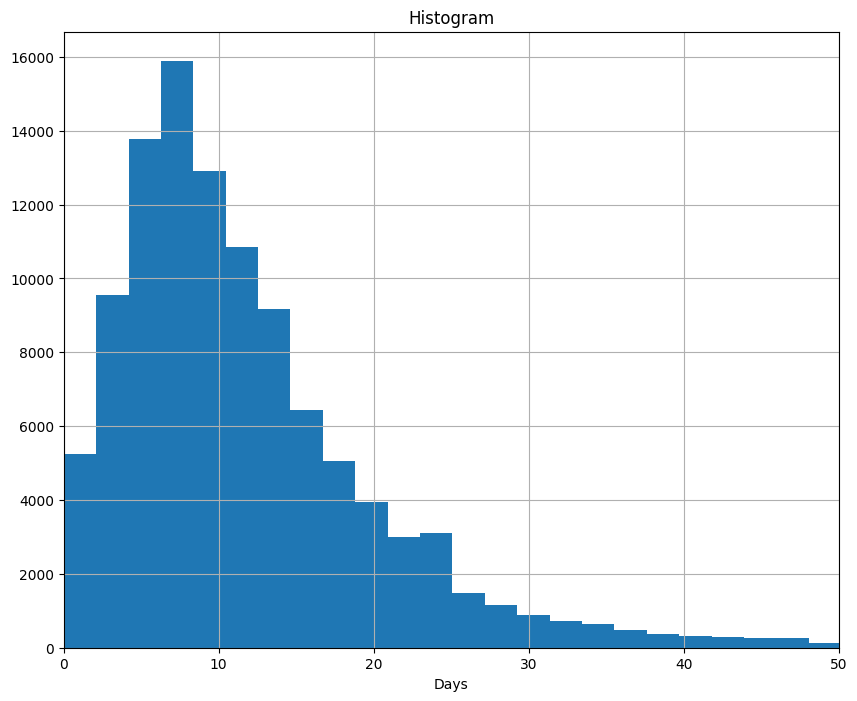

In [49]:
df.wait_time.hist(bins=100, figsize=(10,8))
plt.xlabel('Days')
plt.xlim(0, 50)
plt.title('Histogram')

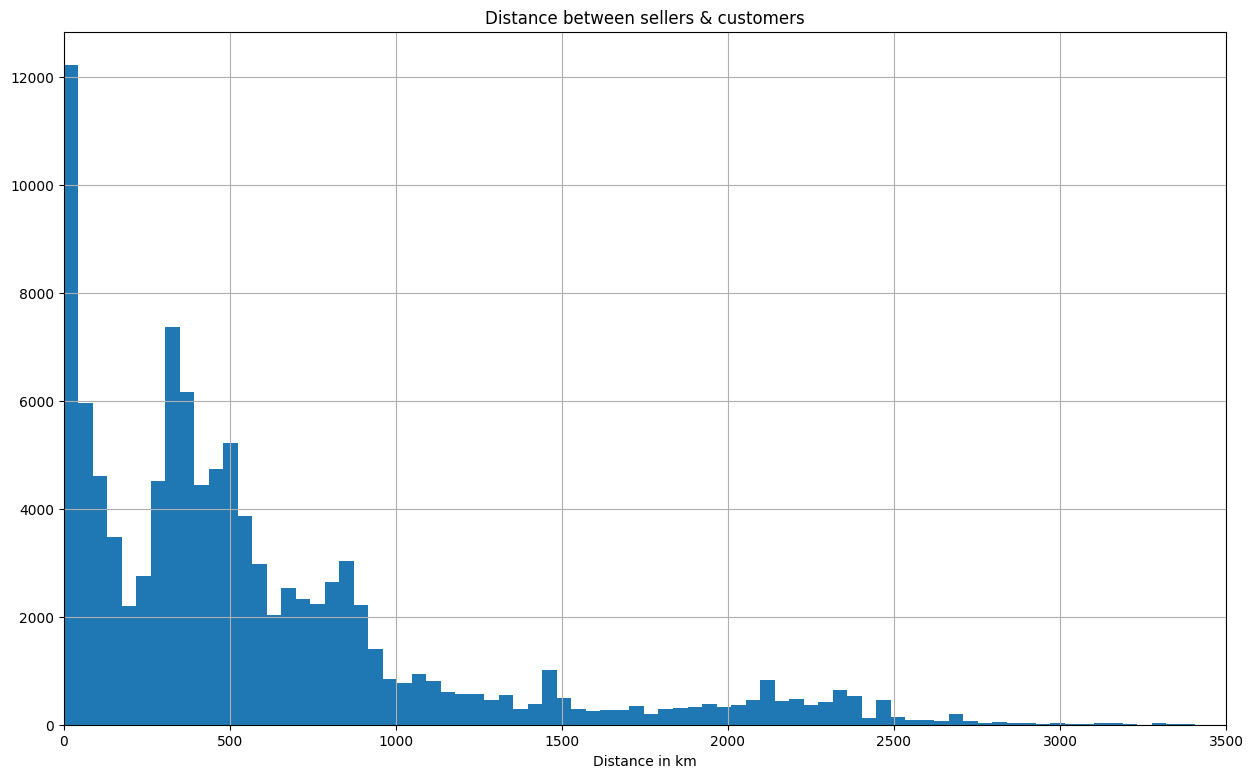

In [50]:
# distance
df.distance.hist(bins=200, figsize=(15,9))
plt.xlabel('Distance in km')
plt.xlim(0, 3500)
plt.title('Distance between sellers & customers');

## Delivery & Purchase per day

In [51]:
daily_delivery = pd.DataFrame(df['order_delivered_customer_date'].groupby([df['order_delivered_customer_date'].dt.date]).count())
daily_order = pd.DataFrame(df['order_purchase_timestamp'].groupby([df['order_purchase_timestamp'].dt.date]).count())


## Represent data on the map

In [52]:
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime

In [53]:
seller_lat_mean = final_df.geolocation_lat_seller.mean()
seller_len_mean = final_df.geolocation_lng_seller.mean()

seller_map = folium.Map(location=[seller_lat_mean, seller_len_mean], control_scale=True, zoom_start=6)


In [54]:
%matplotlib notebook
final_df.loc[:, "count"] =1
heatmap_data = final_df.head(10000)[['geolocation_lat_seller', 'geolocation_lng_seller', 'count']].groupby(['geolocation_lat_seller', 'geolocation_lng_seller']).sum().reset_index().values.tolist()
gradient = {0.1: 'blue', 0.2: 'lime', 0.3: 'orange', 0.4: 'red', 0.5: 'purple', 0.6: 'black'}
HeatMap(data=heatmap_data, radius=5, gradient=gradient, max_zoom=13).add_to(seller_map)
seller_map

## Baseline Model

In [60]:
diff_estim_purchase = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days

basic_score = np.mean(diff_estim_purchase - df['wait_time'])
basic_score

11.290435174238587

In [62]:
df.columns

Index(['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date',
       'geolocation_state_customer', 'geolocation_state_seller', 'distance',
       'product_size_cm3', 'product_weight_g', 'wait_time',
       'order_estimated_delivery_date', 'count'],
      dtype='object')

In [61]:
X = df[['distance', 'geolocation_state_customer', 'geolocation_state_seller',
         'product_size_cm3', 'product_weight_g', 'purchase_dow',
         'year', 'purchase_month']]
y = df['wait_time']

X.head()

KeyError: "['purchase_dow', 'year', 'purchase_month'] not in index"